## **Model Testing**

In [15]:
from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model


In [2]:
model = load_model('mp_hand_gesture')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


---

## **Media Pipe Testing**

In [10]:
import mediapipe as mp
import cv2
import numpy as np

In [2]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [3]:
print(hands)

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [7]:
cap.release()

cv2.destroyAllWindows()

---

## **Testing Data Collection**

In [39]:
import os
import mediapipe as mp 
import numpy as np
import cv2

In [2]:
# mp_holistic = mp.solutions.holistic # Holistic model
# mp_drawing = mp.solutions.drawing_utils # Drawing utilities

mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [40]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
    
    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [86]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello', 'Love'])

# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [87]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [88]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)  
            className = ''
            
            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [85]:
cap.release()
cv2.destroyAllWindows()

---

### **Data Formating**

In [100]:
import os
import pandas as pd
os.getcwd()

'd:\\VIT\\SEM-8\\Test Code\\hand-gesture-recognition-code'

In [62]:
tmp = np.load("./MP_Data/Hello/1/0.npy")
print(tmp.shape)
ee = tmp.flatten()
print(ee.shape)

(21, 2)
(42,)


In [90]:
list_of_files = {}
for (dirpath, dirnames, filenames) in os.walk("MP_Data"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

MP_Data 
 0
MP_Data\Hello 
 0
MP_Data\Love 
 0


In [102]:
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'Hello': 0, 'Love': 1}


In [103]:
hello_files = []
labels = []

for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data", "Hello")):
    if(len(dirnames)==0):
        # print(dirpath, len(filenames))
        for filename in filenames:
            hello_files.append(np.load( os.path.join(dirpath, filename) ))
            labels.append(label_map["Hello"])

print(np.array(hello_files).shape)
print(np.array(labels).shape)

(750, 21, 2)
(750,)


In [140]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data", action)):
        if(len(dirnames)==0):
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename) ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(1500, 21, 2)
(1500,)


In [141]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 750, 1: 750}


In [144]:
# from tensorflow.keras.utils.np_utils import to_categorical

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(1500, 2)


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 1200, 1.0: 1200}
{0.0: 300, 1.0: 300}


In [148]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (1200, 21, 2) (1200, 2)
Test:  (300, 21, 2) (300, 2)


---

## **Model Training**

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [150]:
model = Sequential([
    Flatten(input_shape=(21, 2)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_24 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                

In [151]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)

In [152]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [153]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    callbacks=[callback_checkpoint])

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 2.2435 - accuracy: 0.8933
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9783
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9750
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9892
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9858
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9850
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9500
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.9867
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9833
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9833
Epoch 11/

In [162]:
model.save("./checkpoints/initial_model")

INFO:tensorflow:Assets written to: ./checkpoints/initial_model\assets


---

## **Metrics**

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)
print(y_preds[:10])

[1 1 0 0 0 1 1 0 1 0]


In [158]:
unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 149, 1: 151}


In [159]:
def evaluate_model(history,X_test,y_test,model):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report 
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(18,5))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy')
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss')
  axs[1].legend(['Training'], loc='upper right')

  target_names=["Hello", "Love"]
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))
    

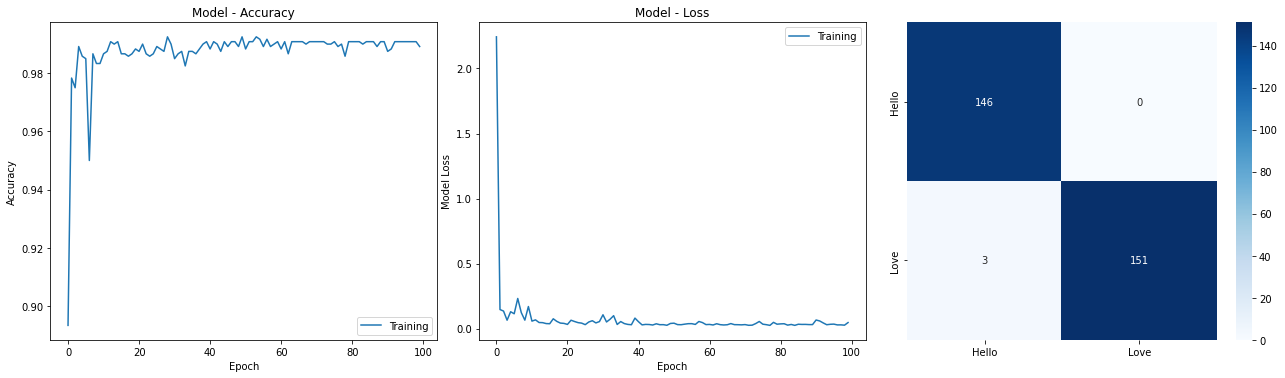


Accuracy: 99.00% 

              precision    recall  f1-score   support

       Hello       0.98      1.00      0.99       146
        Love       1.00      0.98      0.99       154

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [160]:
evaluate_model(history, X_test, y_test, model)

---

## **Testing Video**

In [165]:
# import necessary packages

import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\initial_model')

# Load class names
# f = open('gesture.names', 'r')
# classNames = f.read().split('\n')
# f.close()
classNames = ["Hello", "Love You"]
print(classNames)


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # print(result)
    
    className = ''

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

            # Predict gesture
            prediction = model.predict([landmarks])
            # print(prediction)
            classID = np.argmax(prediction)
            className = classNames[classID]

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['Hello', 'Love']
